In [48]:
# generate and plot synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

# class weights parameter helps to assign more important to very less number of categories

### n_clusters_per_class=1
- Specifies the number of clusters generated per class.

### weights=[0, 99]
- Specifies the proportion of samples for each class.
- The weights list corresponds to the class labels.
- Here, weights=[0, 99] means:
- Class 0 has 0% of the samples (no samples for class 0).
- Class 1 has 99% of the samples.
- Effectively, the dataset will be highly imbalanced with all samples belonging to class 1 (because class 0 is completely absent).



In [49]:
# create imbalanced dataset
X,y = make_classification(n_samples=10000,n_features=2,n_classes=2, n_clusters_per_class=1,n_redundant=0,weights=[0,99],random_state=10)

In [50]:
X

array([[-0.46378482, -0.44607851],
       [-2.81867384, -1.7405457 ],
       [-2.12069946, -1.10055572],
       ...,
       [-0.58874253, -0.90279447],
       [-0.6572926 , -0.55140021],
       [-2.129549  , -1.3709724 ]])

In [51]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
import pandas as pd
x1 = pd.DataFrame(X)[0]
x2 = pd.DataFrame(X)[1]

In [53]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

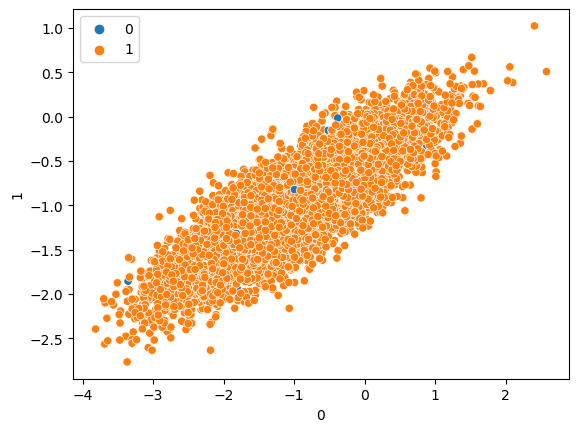

In [54]:
sns.scatterplot(x=x1,y=x2,hue=y)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]

In [65]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [66]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [67]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [68]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs = -1)  #n_jobs = -1 uses all processors in our system

In [69]:
grid.fit(x_train,y_train)

D:\Anacondaa\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anacondaa\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [70]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 1, 1: 1},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [71]:
grid.best_score_

0.9955

In [72]:
grid.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])